#**Churn Prediction**
##importing libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# shape of the csv file
df.shape

(7043, 21)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


###Viewing Dataset Features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###  Knowing about Null values
#### NOTE: All the features have been cleaned, however Total Charges has NULL values.

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Finding unique values for each column

In [ ]:
col=['gender','MultipleLines','InternetService','Contract','PaymentMethod']
# Remaining columns are having values like 'yes' and 'no'
for i in col:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())
    print()

gender
['Female' 'Male']
2

MultipleLines
['No phone service' 'No' 'Yes']
3

InternetService
['DSL' 'Fiber optic' 'No']
3

Contract
['Month-to-month' 'One year' 'Two year']
3

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
4



#### In the MultipleLines column there are data errors for example
#### there are 3 unique columns like 'yes', 'no' ,'no phone service' ,but the values  is nothing but the value 'No'.
#### to counter this we replace 'no phone service' as 'no'.

In [ ]:
df['MultipleLines']=df['MultipleLines'].replace(['No phone service'],'No')

In [ ]:
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

#### Now the data errors are corrected

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Correlation is given by:

df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


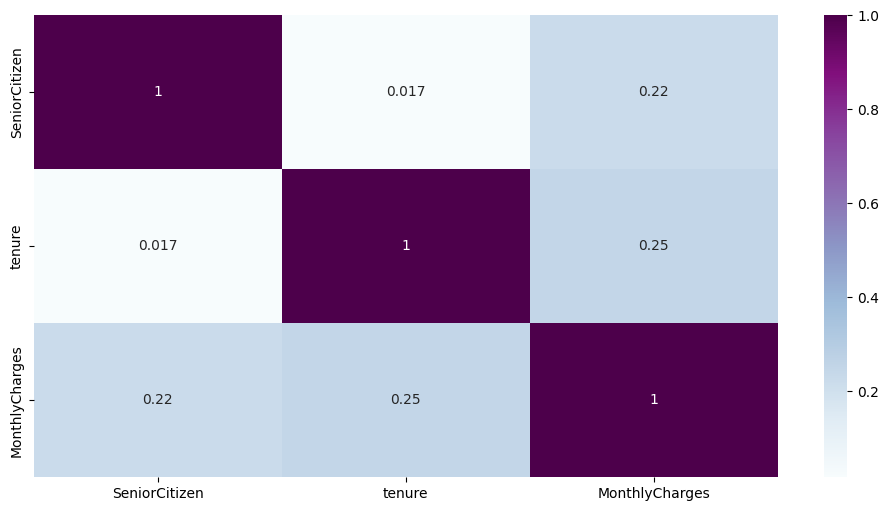

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')
plt.show()

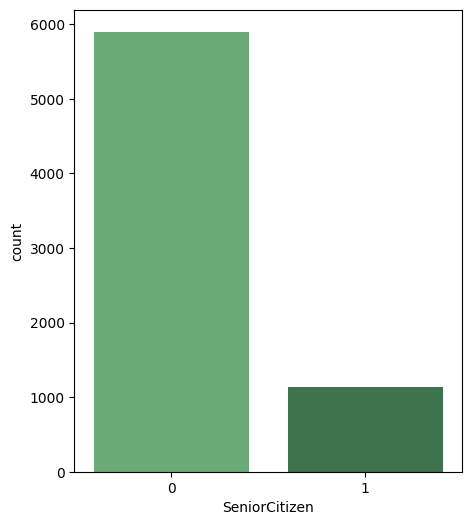

In [ ]:
plt.figure(figsize=(5,6))
sns.countplot(x='SeniorCitizen',data=df,palette='Greens_d')
plt.show()


#### data preparation:

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop('Partner',axis=1,inplace=True)
df.drop('Dependents',axis=1,inplace=True)
df.drop('StreamingMovies',axis=1,inplace=True)
df.drop('StreamingTV',axis=1,inplace=True)
df.drop('PaperlessBilling',axis=1,inplace=True)
df.drop('SeniorCitizen',axis=1,inplace=True)
df.drop('TotalCharges',axis=1,inplace=True)

#### Removal of unwanted columns.

In [ ]:
df.head()

,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,Churn
0,Female,1,No,No,DSL,No,Yes,No,No,Month-to-month,Electronic check,29.85,No
1,Male,34,Yes,No,DSL,Yes,No,Yes,No,One year,Mailed check,56.95,No
2,Male,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,53.85,Yes
3,Male,45,No,No,DSL,Yes,No,Yes,Yes,One year,Bank transfer (automatic),42.30,No
4,Female,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.70,Yes


### Using Label Encoder to transform categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=l.fit_transform(df[col])

In [ ]:
df.head()

,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,0,0,0,2,0,0,0,2,29.85,0
1,1,34,1,0,0,2,0,2,0,1,3,56.95,0
2,1,2,1,0,0,2,2,0,0,0,3,53.85,1
3,1,45,0,0,0,2,0,2,2,1,0,42.30,0
4,0,2,1,0,1,0,0,0,0,0,2,70.70,1


### Splitting data for training and testing :

In [ ]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
xtrain=mms.fit_transform(xtrain)
xtest=mms.fit_transform(xtest)
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)

In [ ]:
Res={'Model':[],'Accuracy':[],'Recall':[],'Precision':[],'F1':[]}

In [ ]:
Results=pd.DataFrame(Res)
Results.head()

,Model,Accuracy,Recall,Precision,F1


### Import of Machine Learning Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

lr=LogisticRegression()
dc=DecisionTreeClassifier()
rf=RandomForestClassifier()
et=ExtraTreesClassifier()
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
gnb=GaussianNB()

model=[lr,dc,rf,et,knn,svm,gnb]

for models in model:
    models.fit(xtrain,ytrain)

    ypred=models.predict(xtest)


    print('Model :',models)
    print('-----------------------------------------------------------------------------------------------------------------------')
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

    print('confusion matrix :',confusion_matrix(ytest,ypred))
    print('classification report:',classification_report(ytest,ypred))
    print('accuracy :',round(accuracy_score(ytest,ypred),2))
    print('precision :',round(precision_score(ytest,ypred),2))
    print('recall :',round(recall_score(ytest,ypred),2))
    print('f1 :',round(f1_score(ytest,ypred),2))
    print()
    R={'Model':models,
             'Accuracy':round(accuracy_score(ytest,ypred),2),
             'Recall':round(recall_score(ytest,ypred),2),
             'Precision':round(precision_score(ytest,ypred),2),
             'F1':round(f1_score(ytest,ypred),2)
            }
    Results=Results.append(R,ignore_index=True)

Model : LogisticRegression()
-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[1386  153]
 [ 257  317]]
classification report:               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.55      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

accuracy : 0.81
precision : 0.67
recall : 0.55
f1 : 0.61

Model : DecisionTreeClassifier()
-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[1263  276]
 [ 298  276]]
classification report:               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1539
           1       0.50      0.48      0.49       574

    accurac

### The following are the Results of Various Models

In [ ]:
Results

,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression(),0.81,0.55,0.67,0.61
1,DecisionTreeClassifier(),0.73,0.48,0.50,0.49
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.78,0.46,0.62,0.53
3,"(ExtraTreeClassifier(random_state=1808732362),...",0.76,0.48,0.57,0.52
4,KNeighborsClassifier(),0.77,0.53,0.59,0.56
5,SVC(),0.80,0.49,0.67,0.56
6,GaussianNB(),0.76,0.75,0.54,0.63
